In [1]:
from pykat import finesse        # import the whole pykat.finesse package
from pykat.commands import *     # import all packages in pykat.commands
import numpy as np               # for basic math/sci/array functions
import matplotlib.pyplot as plt  # for plotting
import pykat.ifo.aligo as aligo
import pykat.ifo.aligo.plot as aligoplt


%matplotlib inline               
pykat.init_pykat_plotting(dpi=90)

from LLO import make_LLO2

                                              ..-
    PyKat 1.2.73          _                  '(
                          \`.|\.__...-""""-_." )
       ..+-----.._        /  ' `            .-'
   . '            `:      7/* _/._\    \   (
  (        '::;;+;;:      `-"' =" /,`"" `) /
  L.        \`:::a:f            c_/     n_'
  ..`--...___`.  .    ,
   `^-....____:   +.      www.gwoptics.org/pykat



In [2]:
base = make_LLO2(verbose=False, withSQZ=True)
base.maxtem

In [3]:
# 1. add a power detector automatically in the right place (and get the power there)

kat1 = base.deepcopy()
kat1.IFO.POW_X.add_signal()
kat1.noxaxis = True
o = kat1.run()
print(o[kat1.IFO.POW_X.name])

247372.565010332


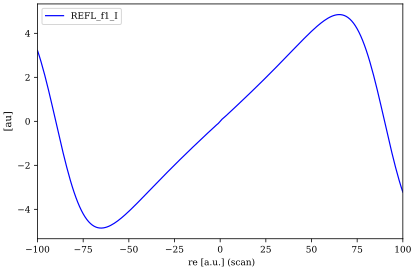

In [4]:
# 2. plot an error signal for a DOF quickly

kat2 = base.deepcopy()
o = kat2.IFO.CARM.scan()
o.plot();

In [21]:
# list all available detectors (Outputs) or DOFs available for use this way
kat2.IFO.Outputs, kat2.IFO.DOFs

({'AS_A_f2': <pykat.ifo.Output at 0x12bcda450>,
  'AS_DC': <pykat.ifo.Output at 0x12bcda490>,
  'AS_f1': <pykat.ifo.Output at 0x12bcda390>,
  'AS_f2': <pykat.ifo.Output at 0x12bcda3d0>,
  'AS_f36': <pykat.ifo.Output at 0x12bcda410>,
  'POP_f1': <pykat.ifo.Output at 0x12bcda290>,
  'POP_f2': <pykat.ifo.Output at 0x12bcda2d0>,
  'POW_BS': <pykat.ifo.Output at 0x12bcda4d0>,
  'POW_X': <pykat.ifo.Output at 0x12bcda510>,
  'POW_Y': <pykat.ifo.Output at 0x12bcda550>,
  'REFL_f1': <pykat.ifo.Output at 0x12bcda310>,
  'REFL_f2': <pykat.ifo.Output at 0x12bcda350>,
  'TRX': <pykat.ifo.Output at 0x12bcda590>,
  'TRY': <pykat.ifo.Output at 0x12bcda5d0>},
 {'CARM': <pykat.ifo.DOF at 0x12bcda910>,
  'CHARD_P': <pykat.ifo.DOF at 0x12bcdaa50>,
  'CSOFT_P': <pykat.ifo.DOF at 0x12bcdaad0>,
  'DARM': <pykat.ifo.DOF at 0x12bcda950>,
  'DARM_h': <pykat.ifo.DOF at 0x12bcda9d0>,
  'DHARD_P': <pykat.ifo.DOF at 0x12bcdaa10>,
  'DSOFT_P': <pykat.ifo.DOF at 0x12bcdab50>,
  'MICH': <pykat.ifo.DOF at 0x12bcda8d0>,

The masses are already included in the model: 39.508


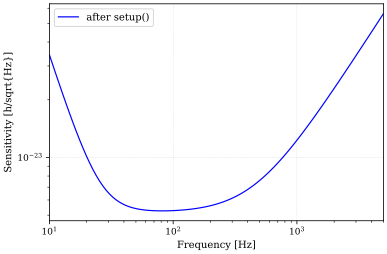

In [6]:
import pykat.ifo.aligo.plot as aligoplt

fig, ax = plt.subplots(1,1)
# aligoplt.strain_sensitivity(base,ax=ax, plot_cmds={'label':'base, maxtem 2'})
# # Looks like we are really near the operating point already, even before the "setup"

base2 = aligo.setup(base)
aligoplt.strain_sensitivity(base2,ax=ax, plot_cmds={'label':'after setup()'})
print(f"The masses are already included in the model: {base2.ETMX.mass}")

plt.legend();

In [15]:
# base2.save("./LLO.kat")

In [14]:
print(base2)

% Generated by PyKat 29.01.2022 13:11:42

%%% FTblock laser
l L0 40.0 0.0 0.0 ni
bs jitter 1.0 0.0 0.0 0.0 ni n0 dump dump
s lmod1 1.0 n0 n1
mod mod1 9099055.0 0.13 1 pm 0.0 n1 n2
s lmod2 1.0 n2 n3
mod mod2 45495275.0 0.139985 1 pm 0.0 n3 nLaserOut
%%% FTend laser

%%% FTblock IMC
s sIMCin 0.0 nLaserOut nMC1in
bs1 MC1 0.006 0.0 0.0 44.59 nMC1in nMC1refl nMC1trans nMC1fromMC3
s sMC1_MC2 16.24057 nMC1trans nMC2in
bs1 MC2 0.0 0.0 0.0 0.82 nMC2in nMC2refl nMC2trans dump
attr MC2 Rcx 27.24
attr MC2 Rcy 27.24
s sMC2_MC3 16.24057 nMC2refl nMC3in
bs1 MC3 0.006 0.0 0.0 44.59 nMC3in nMC3refl nMC3trans nMCreturn_refl
s sMC3substrate 0.0845 1.44963098985906 nMC3trans nMC3ARin
bs2 MC3AR 0.0 0.0 0.0 28.9661 nMC3ARin dump nIMCout dump
s sMC3_MC1 0.465 nMC3refl nMC1fromMC3
%%% FTend IMC

%%% FTblock HAM2
s sHAM2in 0.4282 nIMCout nIM11
bs1 IM1 0.0 0.0 0.0 53.0 nIM11 nIM12 dump dump
s sIM1_IM2 1.2938 nIM12 nIM21
bs1 IM2 0.0 0.0 0.0 7.0 nIM21 nIM22 dump dump
attr IM2 Rcx 12.8
attr IM2 Rcy 12.8
s sIM2_FI 

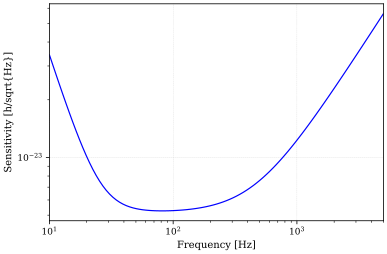

In [8]:
katReload = aligo.make_kat(katfile='./LLO.kat')
katReload.noxaxis = True
aligoplt.strain_sensitivity(katReload);

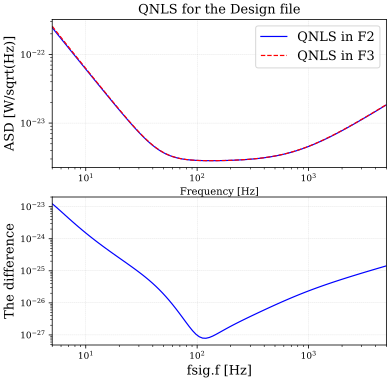

In [5]:
QNLSDesignF3 = np.load("../QNLSDesignF3.npy")

katDesign = aligo.make_kat(katfile='./design.kat')
katDesign = aligo.setup(katDesign)
katDesign.noxaxis = True

x = np.logspace(np.log10(5), np.log10(5000), num=101)

fig,ax =plt.subplots(2,1,figsize=(6,6))

_, outF2 = aligoplt.strain_sensitivity(katDesign, lower=5, ax=ax[0], plot_cmds={'label':"QNLS in F2"});
ax[0].loglog(x, QNLSDesignF3, 'r--', label="QNLS in F3")
ax[0].set_ylabel("ASD [W/sqrt(Hz)]", fontsize=13)
ax[0].legend(loc = 'best', fontsize=13)

ax[1].loglog(x, np.abs(outF2-QNLSDesignF3))
ax[1].set_ylabel("The difference", fontsize=13)
ax[1].set_xlabel("fsig.f [Hz]", fontsize=13);

ax[0].set_title("QNLS for the Design file", fontsize=13)
# fig.savefig('./strain_sensitivityDesignF2and3.pdf')

In [9]:
# np.save("./QNLSDesignF2.npy", outF2)

In [25]:
print(katDesign)

% Generated by PyKat 29.01.2022 13:45:17

%%% FTblock laser
l L0 125.0 0.0 0.0 ni
bs jitter 1.0 0.0 0.0 0.0 ni n0 dump dump
s lmod1 1.0 n0 n1
mod mod1 9099471.0 0.18 1 pm 0.0 n1 n2
s lmod2 1.0 n2 n3
mod mod2 45497355.0 0.18 1 pm 0.0 n3 nLaserOut
%%% FTend laser

%%% FTblock IMC
s sIMCin 0.0 nLaserOut nMC1in
bs1 MC1 0.006 0.0 0.0 44.59 nMC1in nMC1refl nMC1trans nMC1fromMC3
s sMC1_MC2 16.24057 nMC1trans nMC2in
bs1 MC2 0.0 0.0 0.0 0.82 nMC2in nMC2refl nMC2trans dump
attr MC2 Rcx 27.24
attr MC2 Rcy 27.24
s sMC2_MC3 16.24057 nMC2refl nMC3in
bs1 MC3 0.006 0.0 0.0 44.59 nMC3in nMC3refl nMC3trans nMCreturn_refl
s sMC3substrate 0.0845 1.44963098985906 nMC3trans nMC3ARin
bs2 MC3AR 0.0 0.0 0.0 28.9661 nMC3ARin dump nIMCout dump
s sMC3_MC1 0.465 nMC3refl nMC1fromMC3
%%% FTend IMC

%%% FTblock HAM2
s sHAM2in 0.4282 nIMCout nIM11
bs1 IM1 0.0 0.0 0.0 53.0 nIM11 nIM12 dump dump
s sIM1_IM2 1.2938 nIM12 nIM21
bs1 IM2 0.0 0.0 0.0 7.0 nIM21 nIM22 dump dump
attr IM2 Rcx 12.8
attr IM2 Rcy 12.8
s sIM2_FI 0.2

In [17]:
katDesign.detectors

{'AS_DC': <pykat.detectors.pykat.detectors.pd_233 at 0x126190b50>,
 'REFL_f1_I': <pykat.detectors.pykat.detectors.pd_234 at 0x1263b57d0>,
 'POP_f1_I': <pykat.detectors.pykat.detectors.pd_235 at 0x126178d10>,
 'POP_f2_Q': <pykat.detectors.pykat.detectors.pd_236 at 0x1263c5b50>,
 'REFL_f2_I': <pykat.detectors.pykat.detectors.pd_237 at 0x1263b3290>}